In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [104]:
dff = pd.read_excel("C:/Users/deepa/OneDrive/Desktop/project/sydney_rain prediction.xlsx")

## The dataset contains 18 columns:
#### Date:The date of observation
#### Location:The common name of the location of the weather station
#### MinTemp:The minimum temperature in degrees celsius
#### MaxTemp:The maximum temperature in degrees celsius
#### Rainfall:The amount of rainfall recorded for the day in mm
#### Evaporation:The so-called Class A pan evaporation (mm) in the 24 hours to 9am
#### Sunshine:The number of hours of bright sunshine in the day
#### Humidity 9am:Humidity (percent) at 9am
#### Humidity3pm:Humidity (percent) at 3pm
#### Pressure 9am:Atmospheric pressure (hpa) reduced to mean sea level at 9am
#### Pressure 3pm:Atmospheric pressure (hpa) reduced to mean sea level at 3pm
#### Cloud 9 Am:Fraction of sky obscured by cloud at 9am. This is measured in “oktas”, which are a unit of eighths. It records how many eighths of the sky are obscured by clouds. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
#### Cloud3pm:Fraction of sky obscured by clouds (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
#### Temp 9am:Temperature (degrees C) at 9am
#### Temp3pm:Temperature (degrees C) at 3pm
#### RainToday:Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
#### RainTomorrow:Boolean: next day rain

In [105]:
dff.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Data_Preprocessing
### Eleminating null values

In [106]:
dff['MinTemp'].fillna(dff['MinTemp'].mean(), inplace = True)
dff['MaxTemp'].fillna(dff['MaxTemp'].mean(), inplace = True)
dff['Rainfall'].fillna(dff['Rainfall'].mean(), inplace = True)
dff['Evaporation'].fillna(dff['Evaporation'].mean(), inplace = True)
dff['Sunshine'].fillna(dff['Sunshine'].mean(), inplace = True)
dff['Humidity9am'].fillna(dff['Humidity9am'].mean(), inplace = True)
dff['Humidity3pm'].fillna(dff['Humidity3pm'].mean(), inplace = True)
dff['Pressure9am'].fillna(dff['Pressure9am'].mean(), inplace = True)
dff['Pressure3pm'].fillna(dff['Pressure3pm'].mean(), inplace = True)
dff['Temp9am'].fillna(dff['Temp9am'].mean(), inplace = True)
dff['Temp3pm'].fillna(dff['Temp3pm'].mean(), inplace = True)
dff['Temp9am'].fillna(dff['Temp9am'].mean(), inplace = True)

In [107]:
dff['Cloud9am'].fillna(dff['Cloud9am'].mean(), inplace = True)
dff['Cloud3pm'].fillna(dff['Cloud3pm'].mean(), inplace = True)

In [108]:
dff['RainToday'].fillna(value = 'Yes', inplace = True)

In [109]:
dff.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [110]:
dff = dff.drop('Location', axis = 1)

In [111]:
dff = dff.drop('Date', axis = 1)

## Getting_dummies_for categorical data

In [112]:
dff = pd.get_dummies(dff, columns = ['RainToday'], drop_first = True)

In [113]:
dff = pd.get_dummies(dff, columns = ['RainTomorrow'], drop_first = True)

In [114]:
dff.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


# Train_Test_split

In [115]:
x = dff.drop('RainTomorrow_Yes', axis = 1)

In [116]:
y = dff['RainTomorrow_Yes']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Decision_Tree_classification_model

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [120]:
clf_tree = tree.DecisionTreeRegressor( max_depth = 3)

In [121]:
clf_tree.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)

DecisionTreeRegressor(max_depth=3)

In [122]:
y_test_pred = clf_tree.predict(x_test)
y_train_pred = clf_tree.predict(x_train)

# Feature_importance 

# Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable. 

In [123]:
clf_tree.feature_importances_
dff_11 = pd.DataFrame({'Features':x.columns, 'Importances':clf_tree.feature_importances_})
dff_11

,Features,Importances
0,MinTemp,0.000000
1,MaxTemp,0.000000
2,Rainfall,0.000000
3,Evaporation,0.000000
4,Sunshine,0.688123
5,Humidity9am,0.072939
6,Humidity3pm,0.159590
7,Pressure9am,0.000000
8,Pressure3pm,0.000000
9,Cloud9am,0.000000


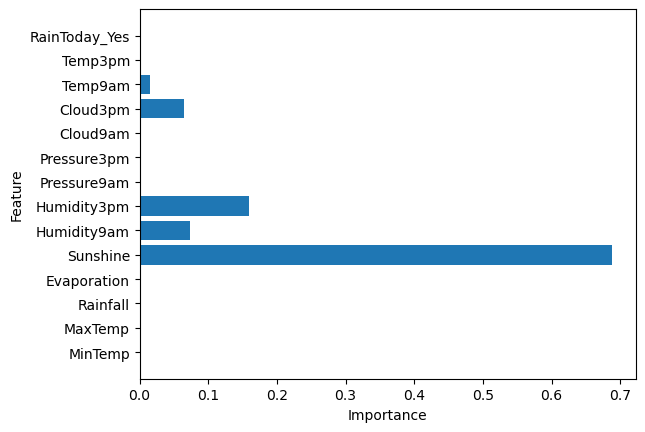

In [124]:
plt.barh(dff_11['Features'], dff_11['Importances'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### Above it could be easily observed that SUNSHINE  is the most important feature in further prediction

# Model_performance

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
mean_squared_error(y_test, y_test_pred)

0.11512938063384084

In [127]:
r2_score(y_train, y_train_pred)

0.2746150165624597

In [128]:
r2_score(y_test, y_test_pred)

0.39628465425065273

In [129]:
roc_auc_score(y_test, y_test_pred)

0.8635808111143028

# Plotting_Decision_Tree

In [130]:
dot_data = tree.export_graphviz(clf_tree, out_file = None)

In [131]:
from IPython.display import Image

In [132]:
import pydotplus

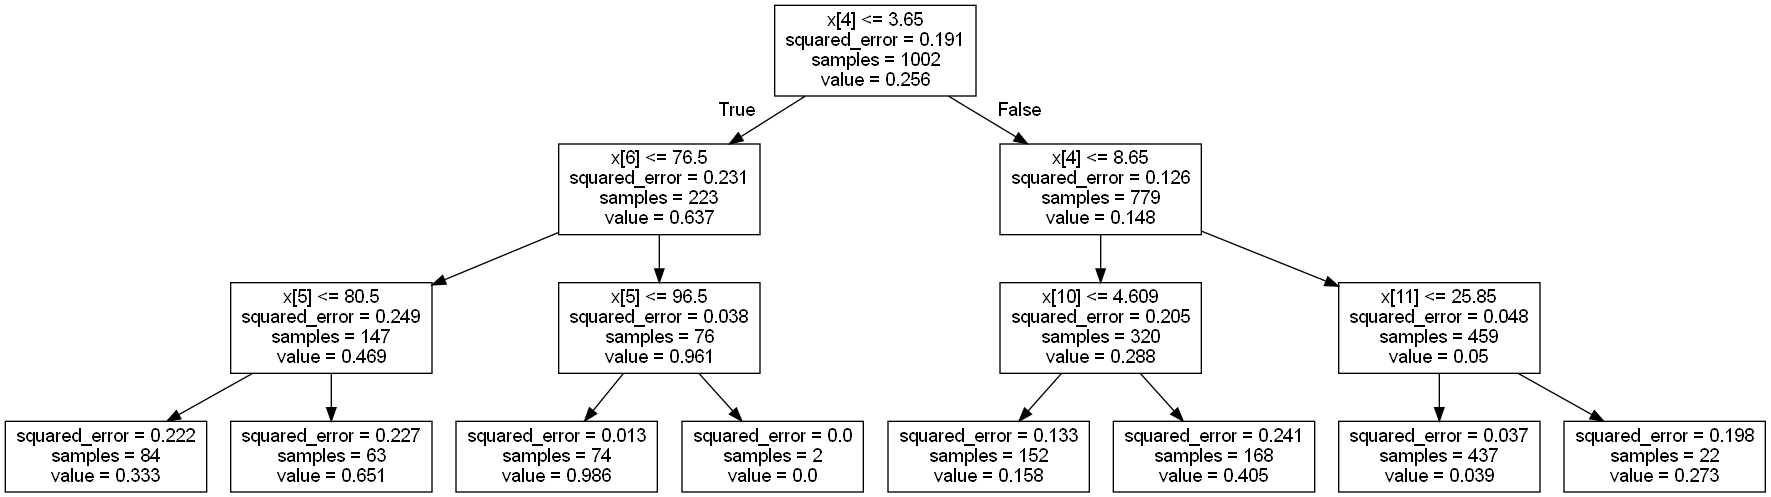

In [133]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Confusion Matrix

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [135]:
clf_lr = LogisticRegression()

In [136]:
clf_lr.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
clf_lr.predict_proba(x)

array([[0.08902865, 0.91097135],
       [0.33297995, 0.66702005],
       [0.13297849, 0.86702151],
       ...,
       [0.68119389, 0.31880611],
       [0.97410381, 0.02589619],
       [0.97268332, 0.02731668]])

In [138]:
y_pred = clf_lr.predict(x_test)

In [139]:
y_pred

array([False, False, False, ..., False, False, False])

In [140]:
confusion_matrix(y_test,y_pred)

array([[691,  54],
       [121, 136]], dtype=int64)

In [141]:
y_pred_1 = (clf_lr.predict_proba(x_test)[:,1]>= 0.3)

In [142]:
y_pred_1

array([False, False, False, ..., False, False, False])

In [143]:
confusion_matrix(y_test,y_pred_1)

array([[614, 131],
       [ 71, 186]], dtype=int64)

# Performance_metrics

In [144]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [145]:
precision_score(y_test, y_pred)

0.7157894736842105

In [146]:
recall_score(y_test, y_pred)

0.5291828793774319

In [147]:
roc_auc_score(y_test, y_pred)

0.7283498289504609

In [148]:
accuracy_score(y_test, y_pred)

0.8253493013972056

# Linear_Discriminant_Analysis

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [150]:
clf_lda = LinearDiscriminantAnalysis()

In [151]:
clf_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [152]:
y_pred_lda = clf_lda.predict(x_test)

In [153]:
confusion_matrix (y_test, y_pred_lda)

array([[681,  64],
       [113, 144]], dtype=int64)

In [154]:
accuracy_score(y_test, y_pred_lda)

0.8233532934131736

# K- Nearest Neighbors

In [155]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)

In [156]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
clf_knn_1.fit(x_test_s, y_test)

KNeighborsClassifier(n_neighbors=1)

In [158]:
x_test_s

array([[-0.56133292, -0.62157592, -0.29891971, ..., -0.19015689,
        -0.61820945, -0.60425377],
       [-0.00615353,  0.58399249, -0.31661442, ..., -0.2517756 ,
        -0.27391559, -0.60425377],
       [ 0.12708953,  1.04430043, -0.31661442, ...,  0.71358414,
         1.26393034, -0.60425377],
       ...,
       [ 0.57123304,  0.05792627, -0.31661442, ...,  0.83682155,
         0.13923705, -0.60425377],
       [ 0.77109763,  1.15389756, -0.31661442, ...,  0.75466327,
         1.08030695, -0.60425377],
       [-0.40588269, -0.02975143, -0.31661442, ...,  0.13847621,
         0.25400167, -0.60425377]])

In [159]:
confusion_matrix(y_test, clf_knn_1.predict(x_test_s))

array([[745,   0],
       [  0, 257]], dtype=int64)

In [160]:
accuracy_score(y_test, clf_knn_1.predict(x_test_s))

1.0

# Bagging_Model

In [161]:
from sklearn.ensemble import BaggingClassifier

In [162]:
clf_bag = BaggingClassifier()

In [163]:
clf_bag.fit(x_train, y_train)

BaggingClassifier()

In [164]:
confusion_matrix(y_test, clf_bag.predict(x_test))

array([[689,  56],
       [131, 126]], dtype=int64)

In [165]:
accuracy_score(y_test, clf_bag.predict(x_test))

0.8133732534930139

# Random_forest_Model

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
clf_rf = RandomForestClassifier()

In [168]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier()

In [169]:
confusion_matrix(y_test, clf_rf.predict(x_test))

array([[698,  47],
       [124, 133]], dtype=int64)

In [170]:
accuracy_score(y_test, clf_rf.predict(x_test))

0.8293413173652695

# Grid_Search

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
clf_gbc =  GradientBoostingClassifier()

In [173]:
clf_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [174]:
confusion_matrix(y_test, clf_gbc.predict(x_test))

array([[702,  43],
       [123, 134]], dtype=int64)

In [175]:
accuracy_score(y_test, clf_gbc.predict(x_test))

0.8343313373253493

# Ada_Boost_Classifier

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
clf_ada = AdaBoostClassifier()

In [178]:
clf_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [179]:
confusion_matrix(y_test, clf_ada.predict(x_test))

array([[695,  50],
       [118, 139]], dtype=int64)

In [180]:
accuracy_score(y_test, clf_ada.predict(x_test))

0.8323353293413174

# XG_BOOST_Model

In [181]:
from xgboost import XGBRegressor, plot_importance

## Feature Importance using xgboost 

## This shows that which feature is making how much impact on the prediction by calculating F score

### It is used to evaluate binary classification systems, which classify examples into 'positive' or 'negative'. 

# F_score = 2 (Precision x Recall)/(Precision + Recall)

In [182]:
clf_xg = XGBRegressor()

In [183]:
clf_xg.fit(x_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

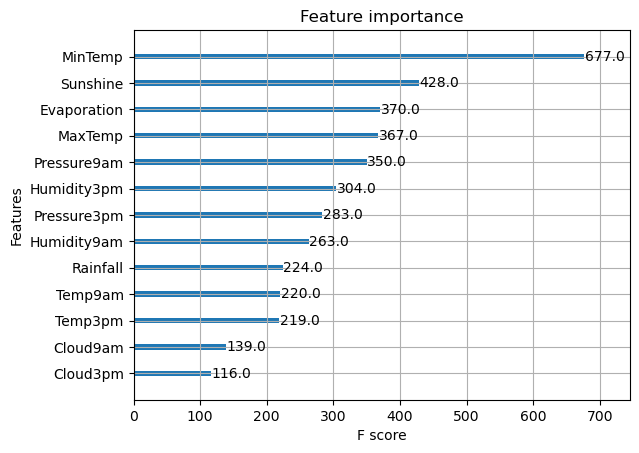

In [184]:
plot_importance(clf_xg)

### In this important feature through XGBOOST Min Tempreture is the most important feature for prediction

In [185]:
plt.show()

In [186]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sn
from sklearn import metrics

In [187]:
y_pred_xg = clf_xg.predict(x_test)

In [188]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred_xg))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred_xg))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg)))
print('R2_score:', r2_score(y_test,y_pred_xg))

MAE :   0.0073154108
MSE :   0.00012809326
RMAE :   0.01131783
R2_score: 0.9993283046556503


In [189]:
roc_auc_score(y_test, clf_xg.predict(x_test))

1.0

C:\Users\deepa\AppData\Local\Temp\ipykernel_26552\1805189984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test -y_pred_xg, bins=50)


<Axes: xlabel='RainTomorrow_Yes', ylabel='Density'>

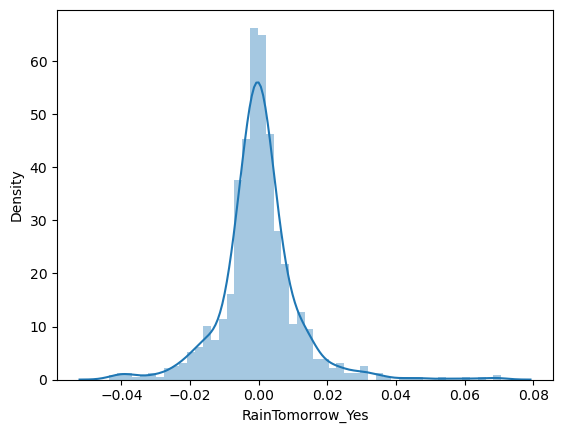

In [190]:
sns.distplot(y_test -y_pred_xg, bins=50)

In [191]:
df_data = {'Model':['Decision Tree Classifier', 'Logistic Regression', 'Linear Discriminant Analysis', 'K-Nearest Neighbor', 'Bagging Model', 'Random Forest', 'Grid search', 'Ada Booster', 'Xgboost'],
             'Acurracy_score': [roc_auc_score(y_test, y_test_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_lda), accuracy_score(y_test, clf_knn_1.predict(x_test_s)), accuracy_score(y_test, clf_bag.predict(x_test)), accuracy_score(y_test, clf_rf.predict(x_test)), accuracy_score(y_test, clf_gbc.predict(x_test)), accuracy_score(y_test, clf_ada.predict(x_test)), roc_auc_score(y_test, clf_xg.predict(x_test))]}

In [192]:
dff_evaluation = pd.DataFrame(df_data)
dff_evaluation

,Model,Acurracy_score
0,Decision Tree Classifier,0.863581
1,Logistic Regression,0.825349
2,Linear Discriminant Analysis,0.823353
3,K-Nearest Neighbor,1.000000
4,Bagging Model,0.813373
5,Random Forest,0.829341
6,Grid search,0.834331
7,Ada Booster,0.832335
8,Xgboost,1.000000


# Project_Task

### Question 1: Your views about the problem statement?

#### Problem Statement was about weather prediction which wants us to predict wheather it will rain tomorrow or not, all along it was a nice learning curve as it challenges all learnt skills like  ensemble techniques and classification techniques etc.

### Question 2: What will be your approach to solving this task?

#### First of all I loaded the excel file and did my data preprocessing part like finding null values and replace it with the mean data. after that i used Dummies for the categorial data. 

#### After preprocessing I started the prediction first of all with Decision Tree Classifier. Finfind features and importance then after use model performance then plot the decision tree. As per the guideline , i used the confusion matrix, perforamance matrix and many other models to solve the task.

#### I have used accuracy score here to compare diffrent modals.

### Question 3: What were the available ML model options you had to perform this task?

### I used below available ML Model option :-
#### Decision Tree Classifier
#### Logistic Regression
#### KNN 
#### Linear Discriminant Analysis
#### Bagging Model
#### Random Forest
#### Grid Search 
#### Ada Booster
#### Xgboost

### Question 4: Which model’s performance is best and what could be the possible reason for that?

#### df_evaluation

#### Above table shows that k-nearest neighbor and xgboost are the model's best performance.

#### KNN is a fairly simple algorithm to understand. It doesn’t rely on any ML model that works inside and makes predictions. KNN is a classification algorithm that only needs to know the number of categories (one or more). This means it can easily determine if a new category should be added without any data on how many other categories there may be. 



#### XGBoost is known for its accuracy and has been shown to outperform other machine learning algorithms in many predictive modeling tasks.XGBoost incorporates regularization techniques to avoid overfitting and improve generalization performance.

### Question 5:  What steps can you take to improve this selected model’s performance even further?

#### To improve model's performance we can follow the below steps:

###  Acquiring more data can help improving model's performance
###  Dealing with outliers and treating them properly like either deleting them or replacing them with artificial values(mean).
### Feature selection let us know about the relation of any feature with the target variables. Using this process we generally reduce the number of features that are going to be modeled. Since the best features are fed into the model it helps in improving the results of the model.